# PCA
In this notebook we will be doing a PCA visualization on both the datasets to see if we can get any intuitive separation of the two classes.

In [1]:
%matplotlib inline
# standard library
import itertools
import sys, os
import re
import glob
import shutil

# pandas
import pandas as pd
import dask.dataframe as dd
import dask.array as da
import dask


# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

# skealrn
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# tesnsorflow
import tensorflow as tf

# local imports
sys.path.append(os.path.join(os.getcwd(), "../src"))

import tf_utils, tf_experiments

# this styling is purely my preference
# less chartjunk
sns.set_context('notebook', font_scale=1.5, rc={'line.linewidth': 2.5})
sns.set(style='ticks', palette='Set2')

In [2]:
def pca_plot(X, y):
    pca = PCA(n_components=2)
    new_X = pca.fit_transform(X[:, np.isnan(X).sum(axis=0) == 0])

    fig = plt.figure()
    ax = fig.add_subplot(111)

    colors = ['turquoise', 'darkorange']
    for i, color in zip([0, 1], colors):
        ax.scatter(new_X[y == i, 0], new_X[y == i, 1], color=color,
                    alpha=.4, label="class {}".format(i))

    return fig, ax

First we start by retrieving the dataset with the functions implemented in `tf_utils`.

In [3]:
# build the tensorflow dataset and load it into a numpy matrix
dataset = tf_utils.build_dataset('../data/final/dragnet/dom-full-test-*.csv', add_weights=False, normalize_data=True)
data = tf_utils.data_from_dataset(dataset, len(dd.read_csv('../data/final/dragnet/dom-full-test-*.csv')))

Now that we have the data, we reduce its dimensionalty and plot it.

## Dragnet datset

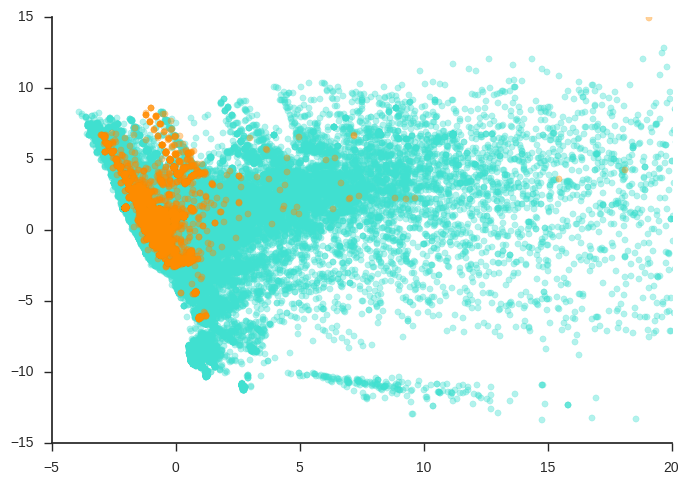

In [4]:
fig, ax = pca_plot(data[0]['X'], data[1])
ax.set_ylim(-15, 15)
ax.set_xlim(-5, 20)
sns.despine()

In [5]:
dataset = tf_utils.build_dataset('../data/final/cleaneval/dom-full-test-*.csv', add_weights=False, normalize_data=True)
data = tf_utils.data_from_dataset(dataset, len(dd.read_csv('../data/final/cleaneval/dom-full-test-*.csv')))

## Cleaneval

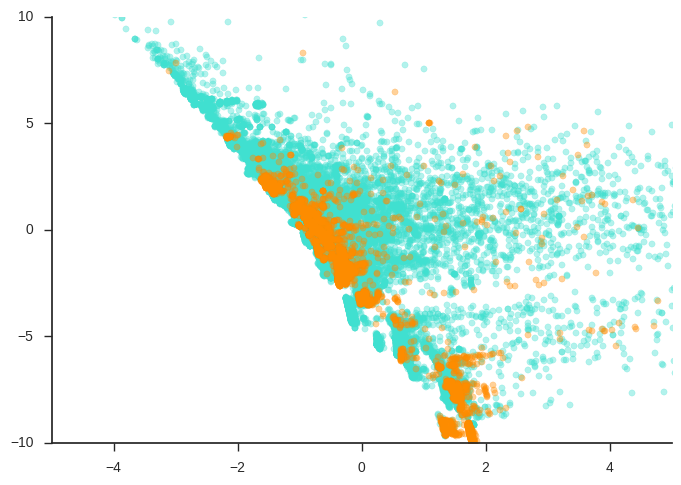

In [6]:
fig, ax = pca_plot(data[0]['X'], data[1])
ax.set_ylim(-10, 10)
ax.set_xlim(-5, 5)
sns.despine()

As we can see in both of the plots, there is clear overlap between the classes, but that does not mean that they are not separable by a model. We can show this by trying to separate the data with a naive model before and after dimensionality reduction.

For this example we'll be using a linear discriminant analysis.

In [7]:
# get the data
X = data[0]['X']
y = data[1]
X = X[:, np.isnan(X).sum(axis=0) == 0]  # drop nan values

pca = PCA(n_components=3)
reduced_X = pca.fit_transform(X)

# pca accuracy
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(reduced_X, y)
print('PCA: ACURRACY FOR CLASS 1: ', lda.score(reduced_X[y==1], y[y == 1]))

# normal accuracy
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(X, y)
print('PCA: ACURRACY FOR CLASS 1: ', lda.score(X[y==1], y[y == 1]))

PCA: ACURRACY FOR CLASS 1:  0.152168703571
PCA: ACURRACY FOR CLASS 1:  0.942727054877


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


As we can clearly see, with PCA we are losing enough informatio to make the classes become unseparable, but the same cannot be said about the unreduced data, which shows really good separability even with a simple model.